In [1]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue

In [8]:
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


In [3]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [4]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [5]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

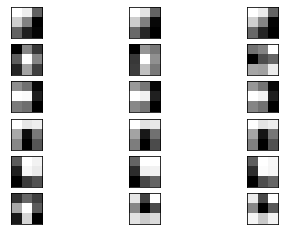

In [6]:
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

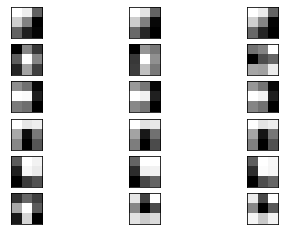

In [7]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import Convolution1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import tensorflow as tf
from multiprocessing import pool
from keras import Model
import keras as keras
from keras import optimizers
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [11]:
# load the image with the required shape

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
#Loading the github file of the image once needed
#model = VGG16(weights='imagenet', include_top=False)

img_path = '/root/JACOBS_UNIVERSITY/Master_Thesis_2020/heatmap2016.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print("The Image:",x)

The Image: [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [12]:
# convert the image to an array


def load_image_pixels(filename, shape):
	# load the image to get its shape

	# convert to numpy array
	image = img_to_array(imag)
	# scale pixel values to [0, 1]
	#image = image.astype('float32')

	# add a dimension so that we have one sample
	image = expand_dims(image, 0)
	return image

In [14]:
# prepare the image (e.g. scale pixel values for the vgg)
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np

img_path = '/root/JACOBS_UNIVERSITY/Master_Thesis_2020/heatmap2016.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

img = preprocess_input(x)
#Print("The Image Dimensionality:",img)

In [15]:
# get feature map for first hidden layer
feature_maps = model.predict(img)
print(feature_maps)

[[[[  0.         42.11969     0.        ...   0.         32.048233
      0.       ]
   [  0.         46.30354    82.50592   ...   0.        324.38287
    164.56157  ]
   [  0.         46.30354    82.50592   ...   0.        324.38287
    164.56157  ]
   ...
   [  0.         46.30354    82.50592   ...   0.        324.38287
    164.56157  ]
   [  0.         46.30354    82.50592   ...   0.        324.38287
    164.56157  ]
   [  2.6100307  32.207623  173.7521    ...   0.        517.4677
    391.77734  ]]

  [[  0.         56.784718    0.        ...   0.          0.
      0.       ]
   [  2.4010158  58.891247   63.275116  ...   0.          2.2158902
     10.105783 ]
   [  2.4010158  58.891247   63.275116  ...   0.          2.2158902
     10.105783 ]
   ...
   [  2.4010158  58.891247   63.275116  ...   0.          2.2158902
     10.105783 ]
   [  2.4010158  58.891247   63.275116  ...   0.          2.2158902
     10.105783 ]
   [377.4902     38.78155   204.1912    ...   0.        382.9466
   

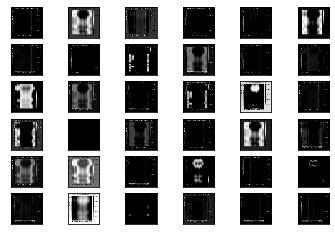

In [25]:
# plot all 64 maps in an 8x8 squares
num_heatmaps = 6
ix = 1
for _ in range(num_heatmaps):
	for _ in range(num_heatmaps):
		# specify subplot and turn of axis
		ax = pyplot.subplot(num_heatmaps, num_heatmaps, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        
		ix += 1
# show the output of new heat maps obtained

pyplot.show()


NameError: name 'Didier' is not defined